# Data Exploration (2) 

This notebook explores the train datase, looking for insights and correlations

## Imports

In [5]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
from extract import extract, DOWNLOAD_PATH, SPOTIFY_DATASET
from data_cleaning import clean_data
from split_test_train import perform_test_train_split

## Load the data

In [2]:
data = extract(SPOTIFY_DATASET, DOWNLOAD_PATH, True)
data = clean_data(data)
test, train = perform_test_train_split(data)

100%|██████████| 8.17M/8.17M [00:00<00:00, 17.5MB/s]

Extracting files...


In [3]:
train.head()

,track_id,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name_sentiment
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0.3612
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,-0.3182
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0.0000
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0.5245
4,5vjLSffimiIP26QG5WcN2K,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0.0000


## Look for correlations

Visualising the relationship between different non-target variables (which have continuous variables)

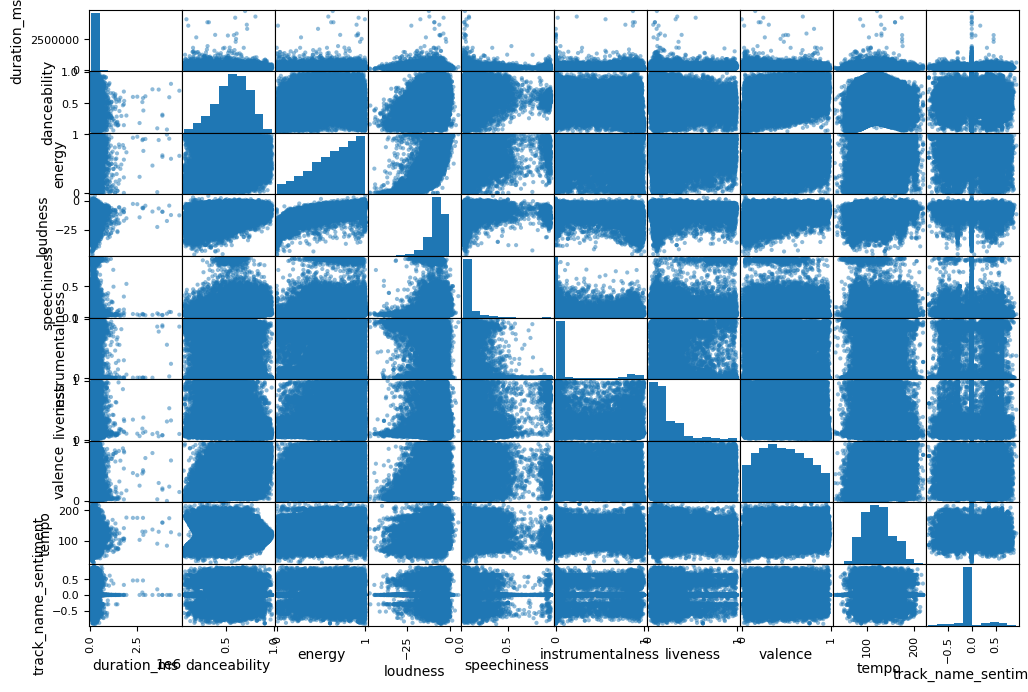

In [7]:
attributes = ["duration_ms","danceability","energy","loudness","speechiness","instrumentalness","liveness","valence","tempo","track_name_sentiment"]



## Experimenting with attribute combinations

## Summary